<a href="https://colab.research.google.com/github/pmewi/Decision-Trees-and-Random-Forests/blob/main/Decision_Trees_%26_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Download and load the dataset.
import pandas as pd
data = pd.read_csv("/content/purchase data.csv")
data.head()

,region,age,new,source,visited,converted
0,NW,25,1,Ads,1,0
1,SE,23,1,Seo,5,0
2,SE,28,1,Seo,4,0
3,NE,39,1,Seo,5,0
4,SE,30,1,Seo,6,0


In [ ]:
#Perform any necessary data cleaning and pre-processing steps [2.5 points].
#checking for NaN values
print(data.isna().sum())

region       0
age          0
new          0
source       0
visited      0
converted    0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   region     316200 non-null  object
 1   age        316200 non-null  int64 
 2   new        316200 non-null  int64 
 3   source     316200 non-null  object
 4   visited    316200 non-null  int64 
 5   converted  316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [ ]:
#Transforming region and source into categorical data types in order to create a decision tree
data['region'].unique()

array(['NW', 'SE', 'NE', 'SW'], dtype=object)

In [ ]:
region_dict = {'NW': 1, 'NE': 2, 'SE': 3, 'SW': 4}
data['region'] = data['region'].replace(region_dict)
print(data.head())

   region  age  new source  visited  converted
0       1   25    1    Ads        1          0
1       3   23    1    Seo        5          0
2       3   28    1    Seo        4          0
3       2   39    1    Seo        5          0
4       3   30    1    Seo        6          0


In [ ]:
data['region'] = data['region'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   region     316200 non-null  category
 1   age        316200 non-null  int64   
 2   new        316200 non-null  int64   
 3   source     316200 non-null  object  
 4   visited    316200 non-null  int64   
 5   converted  316200 non-null  int64   
dtypes: category(1), int64(4), object(1)
memory usage: 12.4+ MB


In [ ]:
data['source'].unique()

array(['Ads', 'Seo', 'Direct'], dtype=object)

In [ ]:
source_dict = {'Ads': 1, 'Seo': 2, 'Direct': 3}
data['source'] = data['source'].replace(source_dict)
print(data.head())

  region  age  new  source  visited  converted
0      1   25    1       1        1          0
1      3   23    1       2        5          0
2      3   28    1       2        4          0
3      2   39    1       2        5          0
4      3   30    1       2        6          0


In [ ]:
data['source'] = data['source'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   region     316200 non-null  category
 1   age        316200 non-null  int64   
 2   new        316200 non-null  int64   
 3   source     316200 non-null  category
 4   visited    316200 non-null  int64   
 5   converted  316200 non-null  int64   
dtypes: category(2), int64(4)
memory usage: 10.3 MB


In [ ]:
#Separating predictors and target variable
colnames = data.columns.values.tolist()
predictors = colnames[:5]
target = colnames[5]

In [ ]:
#Split the dataset into training and testing sets. Use an 80:20 ratio for training and testing, respectively [2.5 points].
import numpy as np
data['is_train'] = np.random.uniform(0, 1, len(data))<=0.8
train, test = data[data['is_train']==True], data[data['is_train']==False]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253421 entries, 0 to 316199
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   region     253421 non-null  category
 1   age        253421 non-null  int64   
 2   new        253421 non-null  int64   
 3   source     253421 non-null  category
 4   visited    253421 non-null  int64   
 5   converted  253421 non-null  int64   
 6   is_train   253421 non-null  bool    
dtypes: bool(1), category(2), int64(4)
memory usage: 10.4 MB


In [ ]:
#Use a decision tree algorithm to develop a model that can predict customer conversion[2.5 points].
#Consider using any of the variables you have available to you in the dataset.

In [ ]:
#creating a decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=20,random_state=99)
dtc.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [ ]:
#Prediction model outcome
preds=dtc.predict(test[predictors])
pd.crosstab(test['converted'],preds,rownames=['Actual'],colnames=['Predictions'])

Predictions,0,1
Actual,,
0,60445,304
1,632,1398


In [ ]:
#cross-validating decision tree with max depth 5
X = data[predictors]
y = data[target]
data2 = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=20,random_state=99)
data2.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
score = np.mean(cross_val_score(data2, X, y, scoring='accuracy', cv=crossvalidation, n_jobs=1))
score

0.9848450347881089

In [ ]:
#cross-validating with max depth 7
data3 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=20,random_state=99)
data3.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20,
                       random_state=99)

In [ ]:
crossvalidation2 = KFold(n_splits=10, shuffle=True, random_state=1)
score2 = np.mean(cross_val_score(data3, X, y, scoring='accuracy', cv=crossvalidation2, n_jobs=1))
score2

0.9855028462998103

In [ ]:
#Once again with max depth 12
data4 = DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_split=20,random_state=99)
data4.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=20,
                       random_state=99)

In [ ]:
crossvalidation3 = KFold(n_splits=10, shuffle=True, random_state=1)
score3 = np.mean(cross_val_score(data4, X, y, scoring='accuracy', cv=crossvalidation3, n_jobs=1))
score3

0.9853889943074003

Slight decrease in score. We will move forward with a max_depth of 7 as it seems to provide the best results (data3).

In [ ]:
#checking variable importance from the model
data3.feature_importances_

array([1.53653927e-02, 1.94484977e-02, 4.92514922e-02, 1.48734166e-04,
       9.15785883e-01])

Predictor variables with greatest influence on target variable seem to be the number of pages visited and whether or not the customer was new or returning.

In [ ]:
#Use a random forests algorithm to develop a model that can predict customer conversion [2.5 points].
#Consider using any of the variables you have available to you in the dataset.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=500)
rf.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=2, oob_score=True)

In [ ]:
#checking random forest model output
preds2=rf.predict(test[predictors])
pd.crosstab(test['converted'],preds2,rownames=['Actual'],colnames=['Predictions'])

Predictions,0,1
Actual,,
0,60544,205
1,545,1485


In [ ]:
crossvalidation4 = KFold(n_splits=10, shuffle=True, random_state=1)
score4 = np.mean(cross_val_score(rf, X, y, scoring='accuracy', cv=crossvalidation4, n_jobs=1))
score4

0.984841872232764

Summarize and compare the performance of the decision tree and random forest models. How well do the models perform, which model performs better, and why? [5 points].
Both models perform very well and the random forest model helps relieve some potential "overfitting" with such accurate scores. The decision tree with a depth of 7 would be the model I use as it shows the greatest accuracy score, albeit by very, very little. 

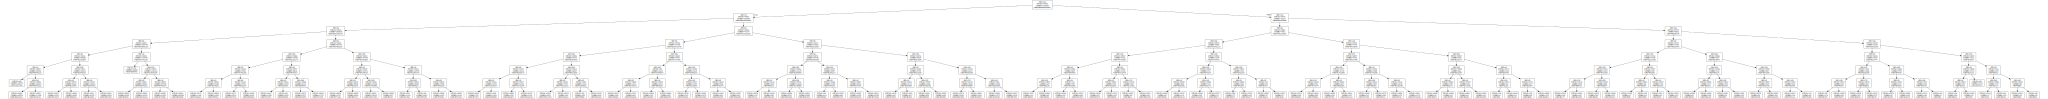

In [ ]:
#provide a visualization for the model you would choose to implement in practice [2.5 points].
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(data3, out_file=None)
graph = graphviz.Source(dot_data)
graph